# 1. Bayesian Inference 
So, you want to know about **Bayesian Techniques** and how they are utilized in Machine Learning? Maybe you have head about the **Causal Revoluation** and want to get a better understanding of the role these techniques played in getting there? Or, you have determined that your problem would be best solved Bayesian A/B Testing? Whatever your reasoning, you have come to the right place. However, before we dissect the techniques listed above, and many others, we need to determine two things:

1. What flaws exist with **Frequentist Statistics**? 
2. What is meant by **Bayesian Statistics**, and how do they help counteract the shortcomings of 1?

Now, I have several posts concerning statistics and probability that I highly recommend reading before continuing (in my math section). However, if you are comfortable with those subjects feel free to continue. The outline of frequentist statistics below are comparatively sparse, since I already have several posts dedicated to their mechanics and intuitions. Below, we cover just enough to see what drawbacks exist in the sub field. With that said, let's get started!

## 1.1 Frequentist Statistics
**Frequentist statistics** test whether an event (_hypothesis_) occurs or not. They calculate the probability of an even in the long run of the experiment-i.e. the experiment is repeated under the same conditions to obtain the outcome. 

Here, the sampling distributions of **fixed size** are taken. Then, the experiment is theoretically repeated an **infinite** number of times, but practically done with a stopping iteration. For example, I perform an experiment with a stopping iteration in mind, say I will stop the experiment after it has been repeated 1000 times. 

This can be demonstrated with a simple example involving a coin toss. Here, we are trying to estimate the fairness of the coin:

|No. of tosses|No. of heads|Difference|
|-------------|------------|----------|
|10|4|-1|
|50|25|0|
|100|44|-6|
|500|255|5|
|1000|502|2|
|5000|2533|33|
|10000|5067|67|

Now, we know that the probability of getting a head on tossing a fair coin is 0.5. We know that the number of heads represents the number of heads obtained. And, we know that the difference is:

$$0.5*(\text{No. of tosses}) - (\text{No. of heads})$$

An important thing is to note that, though the difference between the actual number of heads and expected number of heads (50% of the number of tosses) increases as the number of tosses are increased, the proportion of number of heads to total number of tosses approaches 0.5 (for a fair coin). 

And just like that, our incredibly simple experiment presents us with a very common flaw found the in frequentist approach:

> The result of an experiment is dependent on the number of times the experiment is repeated.

### 1.2 Flaws in Frequentist Statistics
So, let's dig into the flaws of frequentist statistics a bit more thoroughly. There are three main ones that rise above the rest:

#### $p$-values depend on sample size
The **_p_-value** is the probability of obtaining an effect at least as extreme as that in your data, _if_ the null hypothesis is true. Well, because the $p$-value is determined based on the value of a test statistic, and that test statistic is always a function of the number of iterations (i.e. number of coin tosses), if two people work on the exact same data and data generating processes, they may get different $p$-values if their sample size changes. This is clearly undesirable! 

An example may make this more concrete: Person A may choose to stop tossing a coin when the total count reaches 100 while B stops at 1000. For different sample sizes, we get different t-scores and different p-values. Similarly, intention to stop may change from fixed number of flips to total duration of flipping. In this case too, we are bound to get different p-values.

#### Confidence Interval depends on sample size
Like the $p$-value, our confidence interval depends heavily on the sample size. This flies in the face of the goal of statistics! We are trying to determine the ground truth underneath our data. If two people are working with the exact same data set and generating processes, their result's (and certainly the significance) should be consistent.

#### Confidence Intervals are not probability distributions
Because confidence intervals are not probability distributions, they do not provide the most probable value for a parameter. They simple state that (in the case of a 95% confidence interval) if we were to repeat the process of performing the experiment and generating the confidence interval many times, 95% of the confidence intervals would contain the true population mean. This is described in more detail in my post concerning statistical inference and hypothesis testing.

Now, what approach could we take that would allow us to solve the issues above? Specifically, how can **Bayesian Statistics** help us get past frequentist statistics shortcomings?

## 2. Bayesian Statistics
A very simple, yet precise description of bayesian statistics is as follows:

> Bayesian statistics is a mathematical procedure that applies probabilities to statistical problems. It provides people the tools to update their beliefs in the evidence of new data.

However, we can't dissect bayesian statistics without first understanding **Bayes Theorem**. So, that is where we will begin. 

### 2.1 Bayes Theorem
Let's say that we are faced with the following scenario:

* 1% of women have breast cancer (and therefore 99% do not).
* 80% of mammograms detect breast cancer when it is there (and therefore 20% miss it).
* 9.6% of mammograms detect breast cancer when it’s not there (and therefore 90.4% correctly return a negative result).

We can put this into a table that looks like this:

|_____|Cancer (1%)|No Cancer (99%)|
|----|----|----|
|Test Positive|80%|9.6%|
|Test Negative|20%|90.4%|

Here is how we read the table: 
* 1% of women have cancer
* If you already have cancer, you are in the first column. There’s an 80% chance you will test positive. There’s a 20% chance you will test negative.
* If you don’t have cancer, you are in the second column. There’s a 9.6% chance you will test positive, and a 90.4% chance you will test negative.

And, here is how we could represent this graphically:

<img src="https://drive.google.com/uc?id=1UCiKrRWdf94mtpQ2xH-FCChrNLucnQos" width="700">

Keep the above diagram in mind as we go through this example, it is invaluable in thinking of the situation intuitively. 

#### How accurate is the test?
Now supposed that your get a positive test result. What are the chances that you have cancer? 80%? 99%? 15? Lets walk through it. 
* Ok, we got a positive result. It means we’re somewhere in the top row of our table. Let’s not assume anything — it could be a true positive or a false positive.
* The chances of a true positive are equal to: the chance you have cancer * chance test caught it = 1% * 80% = .008
* The chances of a false positive are equal to: the chance you don’t have cancer * chance test caught it anyway = 99% * 9.6% = 0.09504
Lets update our table with this information:

|______________|Cancer (1%)    |No Cancer (99%)      |
|--------------|---------------|---------------------|
|Test Positive|1% x 80% = 0.008|99% x 9.6% = 0.09504 |
|Test Negative|1% x 20% = 0.002|99% x 90.4% = 0.89496|


What was our question again? **What’s the chance we really have cancer if we get a positive result?**. Well, the chance of an event is the number of ways it could happen given all possible outcomes. This leads us to some general intuition about probability! 

$$Probability = \frac{desired \; event}{all \; possibilities}$$

What does that look like in our case? Well we have:
* desired event = given a positive test, we have cancer
* all possibilities = a postive test and having cancer + a positive test and having no cancer

In other words:

$$Probability \; of \;cancer \;given\;positive\;test = \frac{positive\;test\;and\;cancer}{positive\;test\;and\;cancer+positive\;test\;and\;no\;cancer}$$

And if we fill in our values from the table we arrive at:

$$Probability = \frac{0.01*0.8}{0.01*0.8+0.99*0.096}=0.0776=7.6\%$$

**Interesting!** — a positive mammogram only means you have a 7.8% chance of cancer, rather than 80% (the supposed accuracy of the test). It might seem strange at first but it makes sense: the test gives a false positive 9.6% of the time (quite high), so there will be many false positives in a given population. For a rare disease, most of the positive test results will be wrong.

Let’s test our intuition by drawing a conclusion from simply eyeballing the table. If you take 100 people, only 1 person will have cancer (1%), and they’re most likely going to test positive (80% chance). Of the 99 remaining people, about 10% will test positive, so we’ll get roughly 10 false positives. Considering all the positive tests, just 1 in 11 is correct, so there’s a 1/11 chance of having cancer given a positive test. The real number is 7.8% (closer to 1/13, computed above), but we found a reasonable estimate without a calculator.

### Bayes Theorem
Recall (from previous posts), Bayes theorem is defined as: 

$$P(A|B)=\frac{P(A)*P(B|A)}{P(B)}$$

In our example that would look like:

$$P(cancer\;|\;positive\;test)=\frac{P(cancer)*P(positive\;test\;|\;cancer)}{P(positive\;test)}$$

$$\frac{0.01*0.8}{0.01*0.8+0.99*0.096}=7.8\%$$

This yields the same result as our general intuition equation! Maybe Bayes theorem isn't so hard after all...

TODO: Add important points from Book of Why, chapter 3...

## 3. Bayesian Inference
The above example is very helpful to explain where Bayesian Inference comes from and showing the mechanics in action. However, in Data Science applications it is generally used to to interpret data! By pulling in prior knowledge about what we know, we can draw stronger conclusions with small data sets! 

### 3.1 Probability Distributions as Beliefs
In a probability distribution the area must always add up to 1. It's helpful to think of probabilities as **beliefs** about the world; specifically the associated confidence surrounding particular beliefs. For instance, say we wanted to develop beliefs surrounding the height's of people. One way to do that is to utilize a **probability distribution**. So, say we have access to the following height data:

In [11]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib import rc, animation
import numpy as np
import pandas as pd
from IPython.core.display import HTML

import seaborn as sns
sns.set(style="white", palette="husl")
sns.set_context("talk")
sns.set_style("ticks")

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [44]:
mu, sigma = 5.83, 0.4
normal_dist = np.random.normal(mu, sigma, 1000)
heights = np.around(normal_dist, decimals=2)
indices = np.arange(1,1000)
df_heights = pd.DataFrame({
     'Height (ft)':heights   
})
df_heights.index.rename('Person', inplace=True)

In [45]:
display(df_heights.head(10))

,Height (ft)
Person,
0,6.21
1,6.10
2,6.37
3,5.47
4,6.25
5,5.97
6,6.11
7,5.59
8,6.11


We can then plot a **discrete** distribution (limited in the number of values it can take on), breaking down into smaller and smaller bins (shown below). For instance, if I asked you predict whether someones height (without seeing them) was greater or less than 5 feet 8 inches, your beliefs about their probability may be as follows:

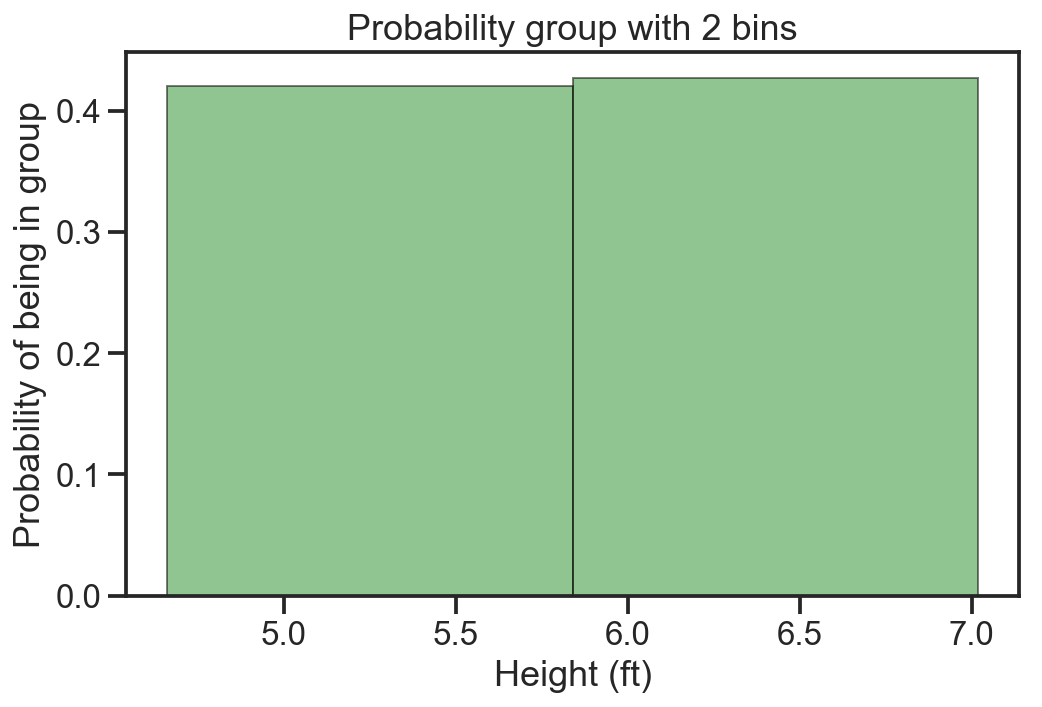

In [88]:
def normal_dist_experiment(num_bins, y_label, title, normed=False, plot_continuous_dist=False):
    fig = plt.figure(figsize=(8,5))

    count, bins, ignored = plt.hist(
        heights,
        num_bins,
        density=normed,
        color='forestgreen',
        alpha=0.5,
        linewidth=1,
        edgecolor='black'
    )
    if plot_continuous_dist:
        y = 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) )
        plt.plot(
            bins,
            y,
            linewidth=2,
            color='r'
        )
        plt.fill_between(bins, y, color=sns.xkcd_rgb["light green"], alpha=0.4)
    plt.xlabel(f'Height (ft)')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    
normal_dist_experiment(2, 'Probability of being in group', f'Probability group with {2} bins', normed=True)

If I then changed the question, asking you the probability of which of the 5 bins below their height fell into, you beliefs may look something like:

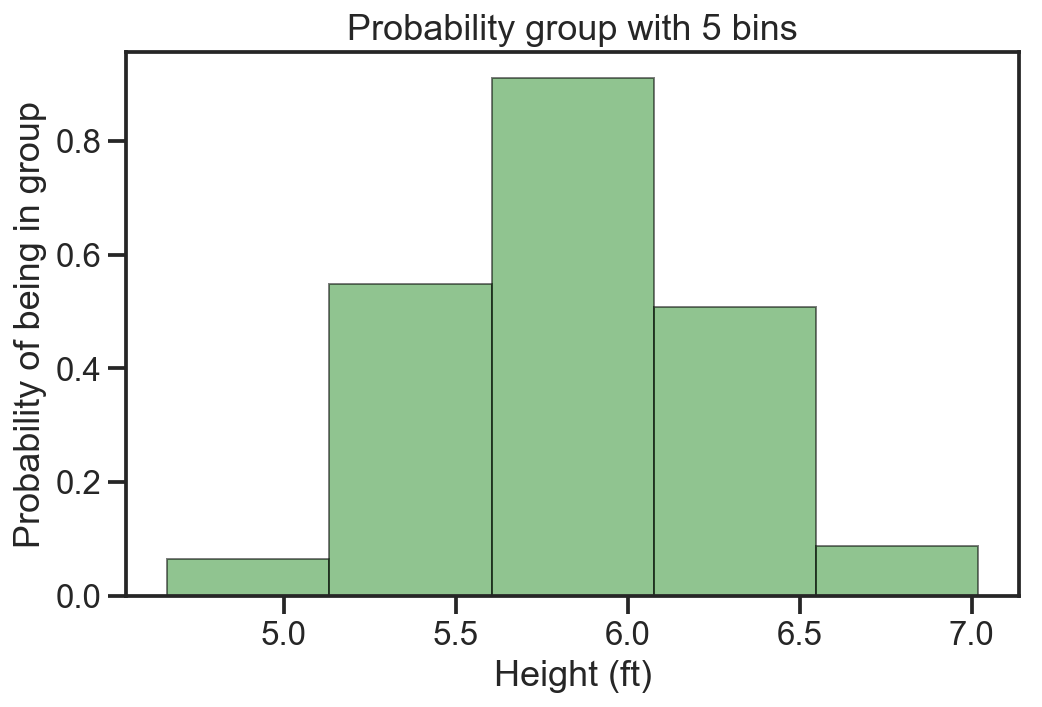

In [81]:
normal_dist_experiment(5, 'Probability of being in group', f'Probability group with {5} bins', normed=True)

And we could keep breaking the distributions into finer and finer bins, slowly creating a finer-grained set of beliefs:

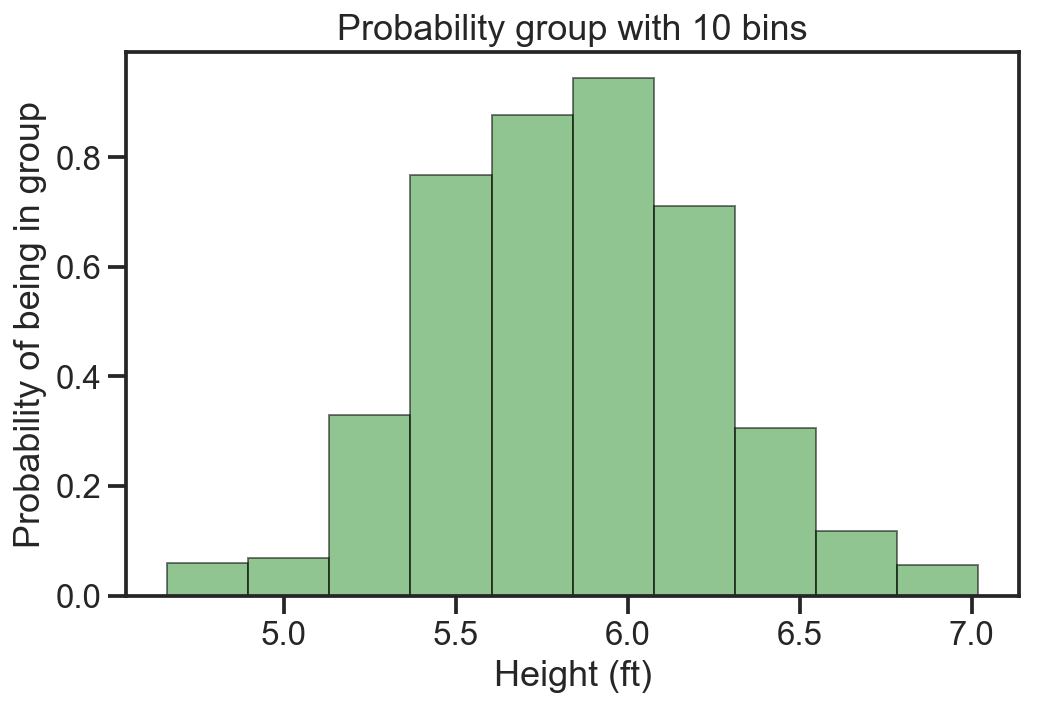

In [82]:
normal_dist_experiment(10, 'Probability of being in group', f'Probability group with {10} bins', normed=True)

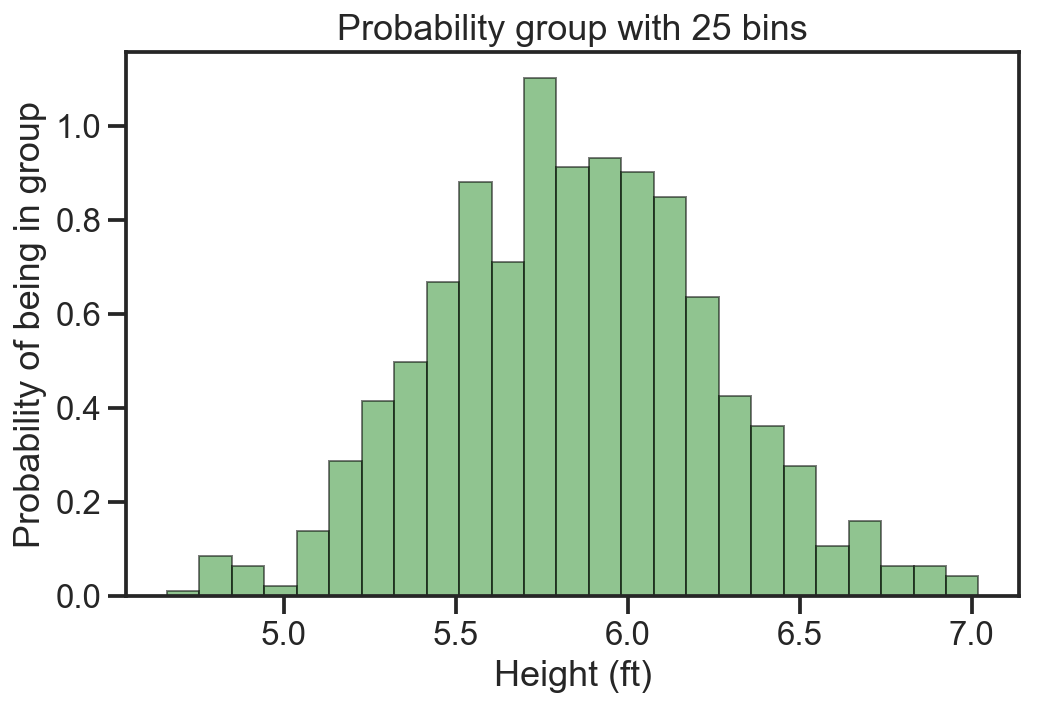

In [83]:
normal_dist_experiment(25, 'Probability of being in group', f'Probability group with {25} bins', normed=True)

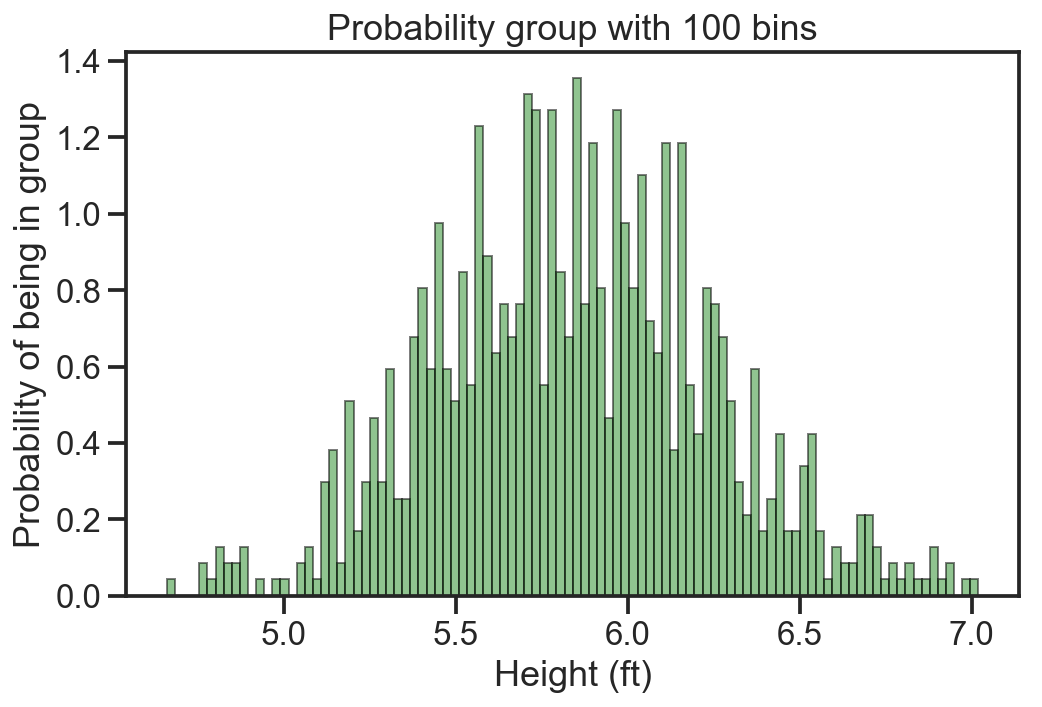

In [84]:
normal_dist_experiment(100, 'Probability of being in group', f'Probability group with {100} bins', normed=True)

Until the distribution has finally become continuous! It is import to remember that this continuous distribution still shows how your belief is allocated! 

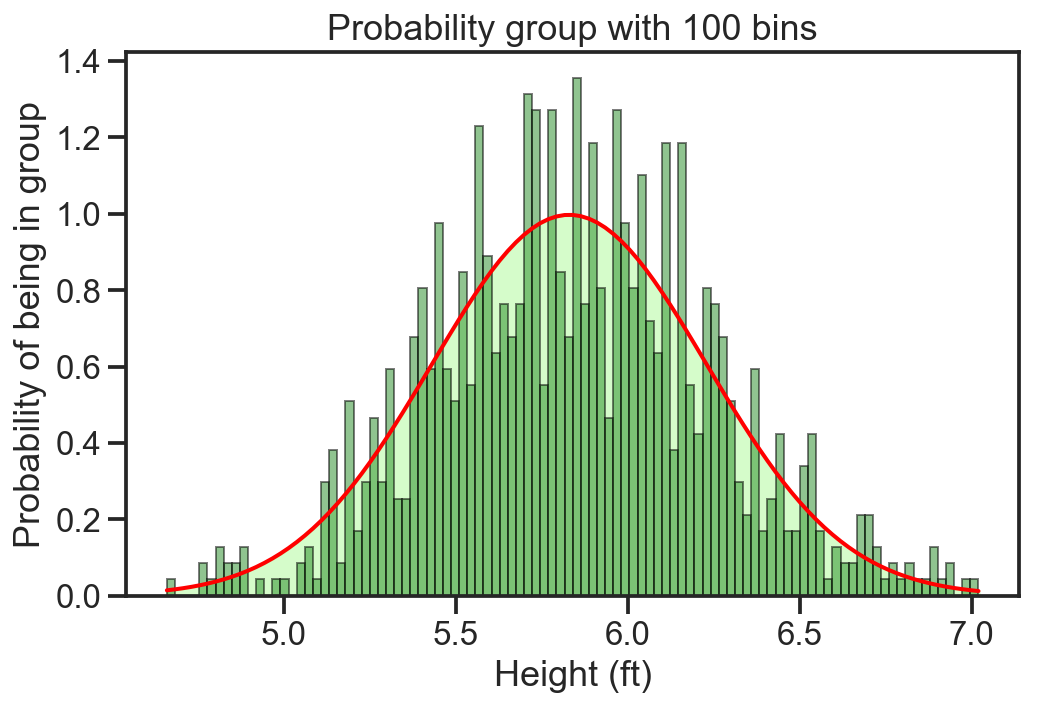

In [89]:
normal_dist_experiment(
    100,
    'Probability of being in group',
    f'Probability group with {100} bins',
    normed=True,
    plot_continuous_dist=True
)

Once you have your beliefs, you can determine things such as the average, median, standard devation:

In [55]:
print('Mean height: ', np.around(heights.mean(), decimals=2), 'ft')
print('Median height: ', np.around(np.median(heights), decimals=2), 'ft')
print('Standard deviation in height: ', np.around(heights.std(), decimals=2), 'ft')

Mean height:  5.84 ft
Median height:  5.84 ft
Standard deviation in height:  0.4 ft


The key intuition to remember here is that we can think of probability distributions as: 

> For all of these heights, where am I placing my bets? What do I believe, and how much?

The whole point is to determine your beliefs! Once you have your beliefs you can determine the average, median, mode, etc!

### 3.2 Bayesian Inference Example